# Statistical Foundations: Practical Assignment 10
---
## **Submission Info**
| Attribute | Value |
|-----------|-------|
| **Name** | Divyansh Langeh |
| **ID**          | GF202349802 |
| **Subject**     | Statistical Foundation of Data Science |
| **Assignment**  | Practical 10 - Principal Component Analysis (PCA) |
| **Repo**        | [View my GitHub Repo](https://github.com/JoyBoy2108/Statistical-foundations-of-data-science-practicals) |

---
## **Assignment Overview**
This notebook contains the solution for the tenth practical assignment in the Statistical Foundation of Data Sciences course. It focuses on Principal Component Analysis (PCA) for dimensionality reduction and class separation analysis on the Wine dataset.

---
## **Notebook Introduction**

This notebook implements Principal Component Analysis (PCA) on the Wine dataset to perform dimensionality reduction and improve class separation.

### **Key Tasks to be Performed:**

* **Task 1: Basic Statistics**
    Display the statistical summary of the wine dataset using describe().

* **Task 2: Boxplot by Output Labels/Classes**
    Create boxplots to visualize feature distributions across different wine classes.

* **Task 3: Scatterplot using Two Variables**
    Visualize relationships between pairs of features using scatterplots.

* **Task 4: Plot Co-Variance Matrix**
    Create a heatmap of the covariance matrix to show feature correlations.

* **Task 5: Data Scaling**
    Standardize features to ensure equal contribution to PCA.

* **Task 6: Class Separation using Principal Components**
    Apply PCA and visualize improved class separation in lower-dimensional space.

### **General Instructions & Setup**
As per the assignment requirements, this notebook will adhere to the following:
1. The Wine dataset from scikit-learn will be used.
2. The random seed is set to 42 for reproducibility.
3. All visualizations will be clear and informative.

*Let's begin with the Environment setup.*

---

## Environment Setup and Dependencies

Start by importing all the required libraries for PCA analysis.

In [21]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Set the random seed to 42 for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn version: {__import__('sklearn').__version__}")

Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.3
Scikit-learn version: 1.7.2


## Load and Prepare Data

Load the Wine dataset and create a DataFrame for analysis.

In [22]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y
df['class'] = df['target'].map({0: 'Class 0', 1: 'Class 1', 2: 'Class 2'})

print("Dataset loaded successfully!")
print(f"Shape of dataset: {df.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset loaded successfully!
Shape of dataset: (178, 15)
Number of features: 13
Number of samples: 178
Number of classes: 3


## Task 1: Display Basic Statistics using describe()

In [23]:
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  

In [24]:
print("\nStatistical Summary of Features:")
print(df.describe())


Statistical Summary of Features:
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453  

## Task 2: Boxplot by Output Labels/Classes

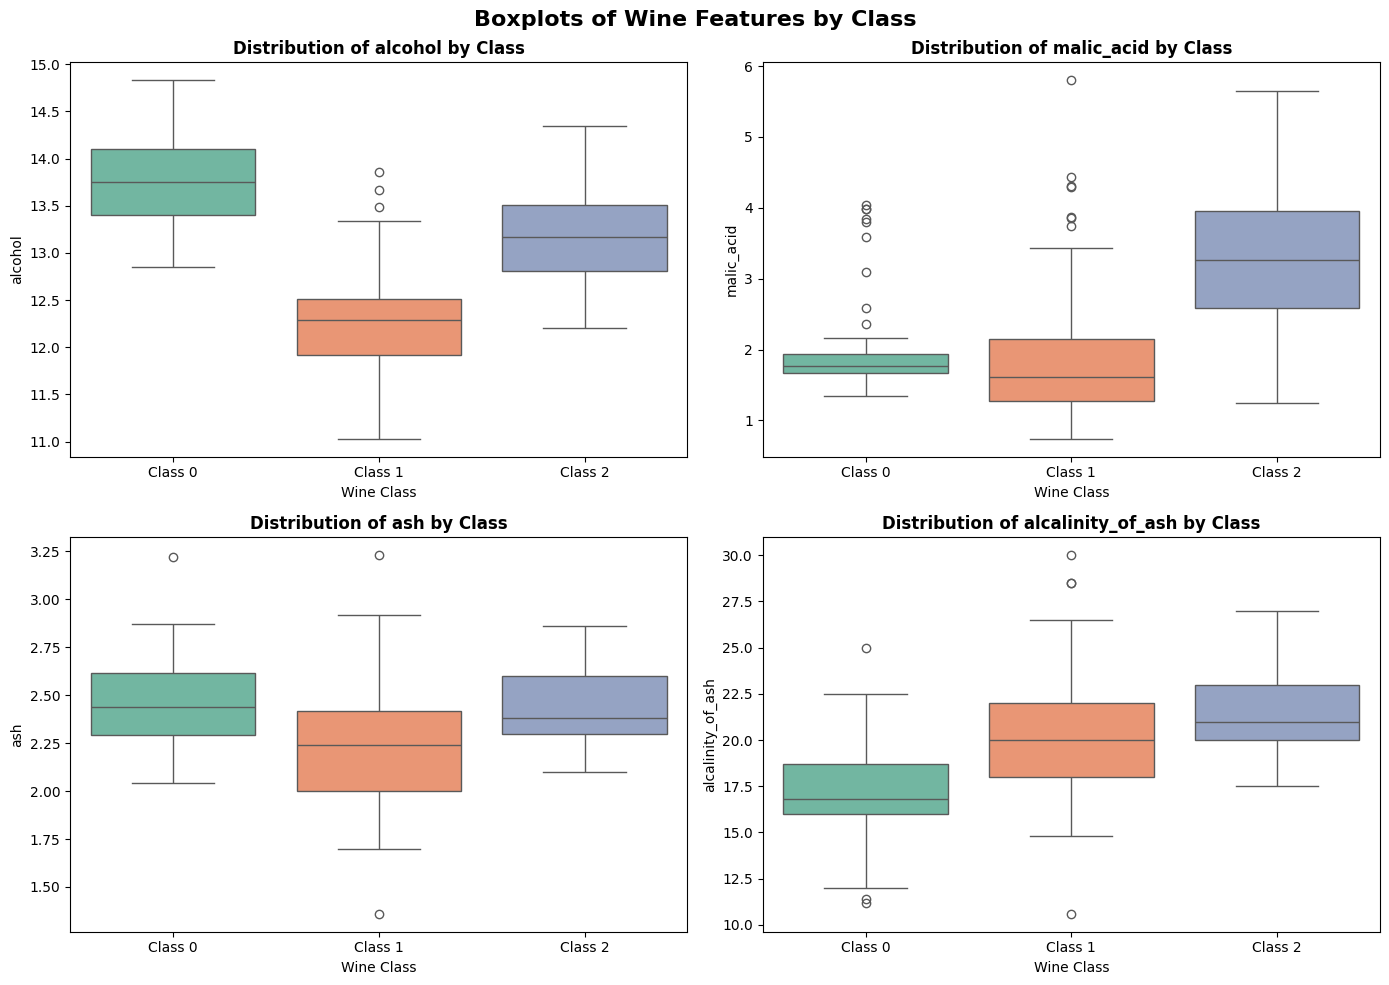

Boxplots created successfully!


In [25]:
# Create boxplots for selected features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Boxplots of Wine Features by Class', fontsize=16, fontweight='bold')

features_to_plot = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash']

for idx, (ax, feature) in enumerate(zip(axes.flatten(), features_to_plot)):
    sns.boxplot(data=df, x='class', y=feature, ax=ax, palette='Set2')
    ax.set_title(f'Distribution of {feature} by Class', fontweight='bold')
    ax.set_xlabel('Wine Class')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

print("Boxplots created successfully!")

## Task 3: Scatterplot using Two Variables

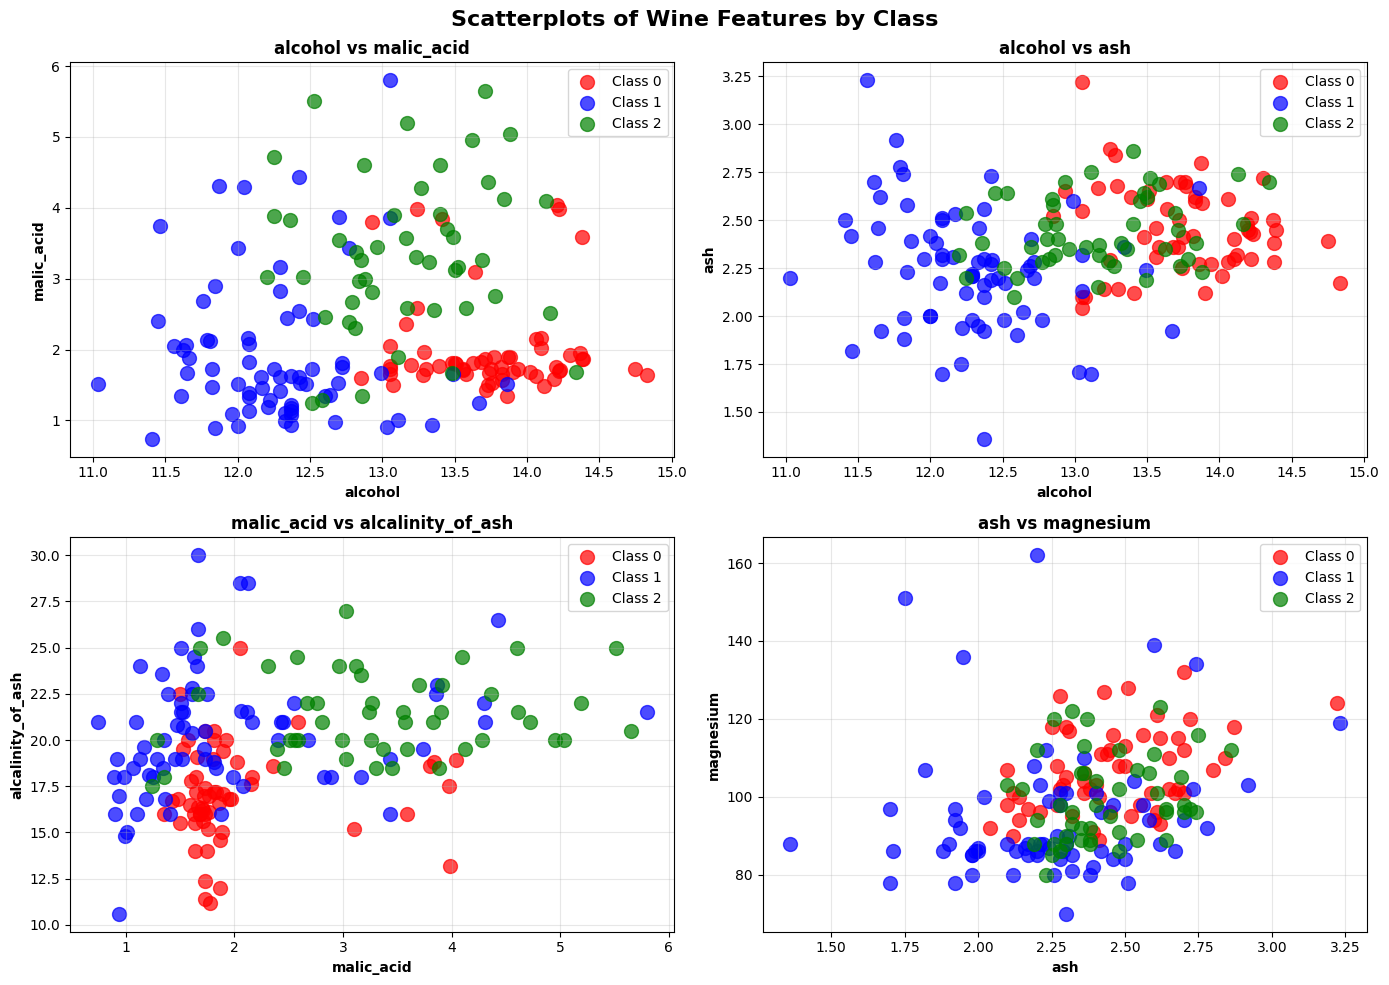

Scatterplots created successfully!


In [26]:
# Create scatterplots for different pairs of features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Scatterplots of Wine Features by Class', fontsize=16, fontweight='bold')

feature_pairs = [
    ('alcohol', 'malic_acid'),
    ('alcohol', 'ash'),
    ('malic_acid', 'alcalinity_of_ash'),
    ('ash', 'magnesium')
]

colors = ['red', 'blue', 'green']

for idx, (ax, (x_feat, y_feat)) in enumerate(zip(axes.flatten(), feature_pairs)):
    for class_label in np.unique(y):
        class_mask = df['target'] == class_label
        ax.scatter(df[class_mask][x_feat], df[class_mask][y_feat], 
                  label=f'Class {class_label}', alpha=0.7, s=100, color=colors[class_label])
    ax.set_xlabel(x_feat, fontweight='bold')
    ax.set_ylabel(y_feat, fontweight='bold')
    ax.set_title(f'{x_feat} vs {y_feat}', fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Scatterplots created successfully!")

## Task 4: Plot Co-Variance Matrix

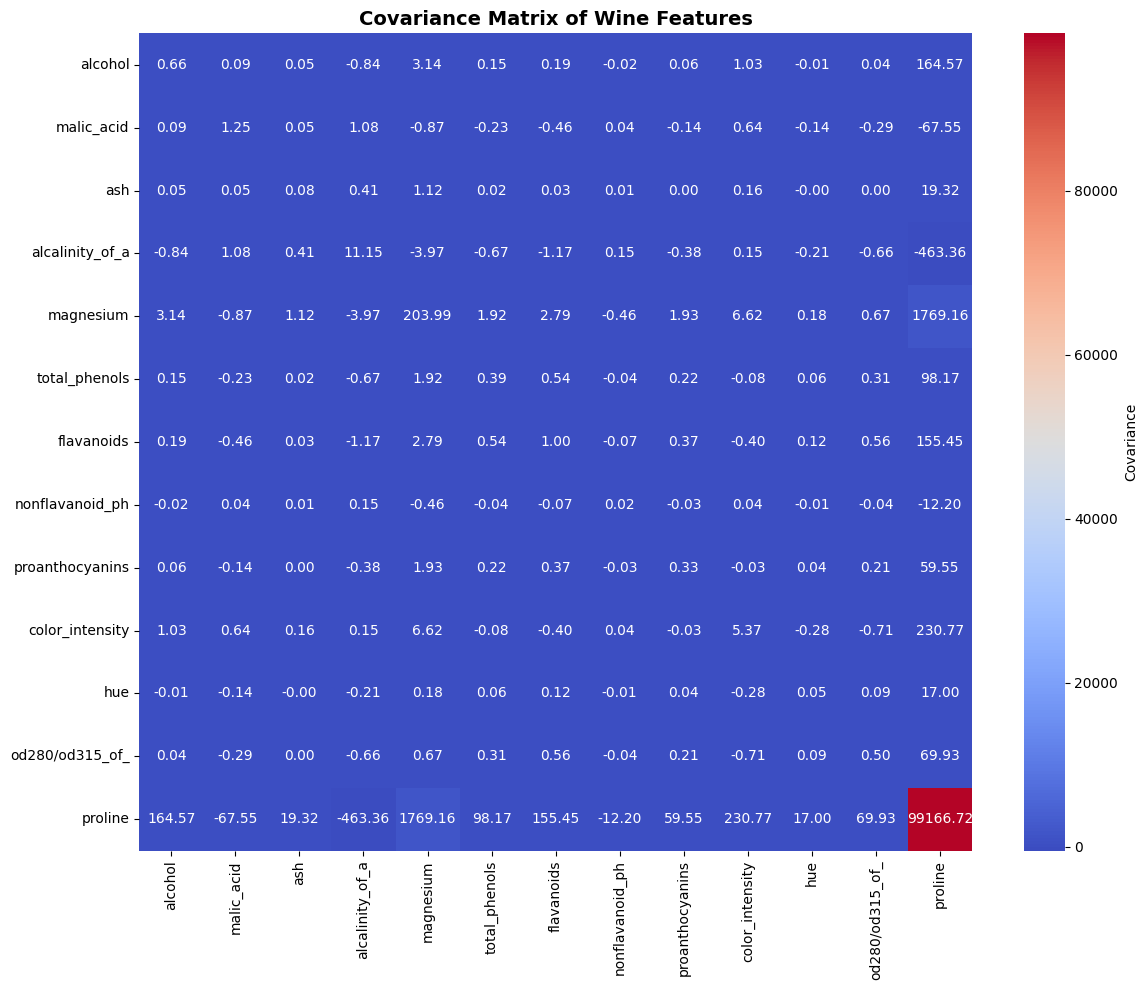


Covariance Matrix Summary:
Shape of covariance matrix: (13, 13)

Top 5 highest correlations (excluding diagonal):


In [27]:
# Calculate covariance matrix
cov_matrix = np.cov(X.T)

# Create heatmap of covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            xticklabels=[name[:15] for name in wine.feature_names],
            yticklabels=[name[:15] for name in wine.feature_names],
            cbar_kws={'label': 'Covariance'})
plt.title('Covariance Matrix of Wine Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCovariance Matrix Summary:")
print(f"Shape of covariance matrix: {cov_matrix.shape}")

# Get correlation matrix
corr_matrix = np.corrcoef(X.T)
# Flatten and get indices of top correlations
flat_corr = corr_matrix.flatten()
top_indices = np.argsort(np.abs(flat_corr))[-16:-1]  # Exclude diagonal

print(f"\nTop 5 highest correlations (excluding diagonal):")
for idx in reversed(top_indices[-5:]):
    row = idx // len(wine.feature_names)
    col = idx % len(wine.feature_names)
    if row != col:
        print(f"{wine.feature_names[row][:20]} <-> {wine.feature_names[col][:20]}: {corr_matrix[row, col]:.4f}")

## Task 5: Data Scaling

In [28]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Create DataFrame with scaled data
df_scaled = pd.DataFrame(X_scaled, columns=wine.feature_names)
df_scaled['target'] = y

print("Feature scaling completed!")
print(f"\nOriginal Data - Mean and Std:")
print(f"Mean of original features: {X.mean(axis=0)[:5]}...")
print(f"Std of original features: {X.std(axis=0)[:5]}...")

print(f"\nScaled Data - Mean and Std:")
print(f"Mean of scaled features (should be ~0): {X_scaled.mean(axis=0)[:5]}...")
print(f"Std of scaled features (should be ~1): {X_scaled.std(axis=0)[:5]}...")

Feature scaling completed!

Original Data - Mean and Std:
Mean of original features: [13.00061798  2.33634831  2.36651685 19.49494382 99.74157303]...
Std of original features: [ 0.80954291  1.11400363  0.27357229  3.33016976 14.24230767]...

Scaled Data - Mean and Std:
Mean of scaled features (should be ~0): [ 7.84141790e-15  2.44498554e-16 -4.05917497e-15 -7.11041712e-17
 -2.49488320e-17]...
Std of scaled features (should be ~1): [1. 1. 1. 1. 1.]...


## Task 6: Class Separation using Principal Components

### Explained Variance by Principal Components

In [29]:
# Apply PCA with all components to see explained variance
pca_full = PCA()
pca_full.fit(X_scaled)

# Calculate explained variance
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance Ratio by each Principal Component:")
for i, var in enumerate(explained_variance[:5]):
    print(f"PC{i+1}: {var:.4f} (Cumulative: {cumulative_variance[i]:.4f})")

print(f"\nNumber of components to explain 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")

Explained Variance Ratio by each Principal Component:
PC1: 0.3620 (Cumulative: 0.3620)
PC2: 0.1921 (Cumulative: 0.5541)
PC3: 0.1112 (Cumulative: 0.6653)
PC4: 0.0707 (Cumulative: 0.7360)
PC5: 0.0656 (Cumulative: 0.8016)

Number of components to explain 95% variance: 10


### Plot Explained Variance

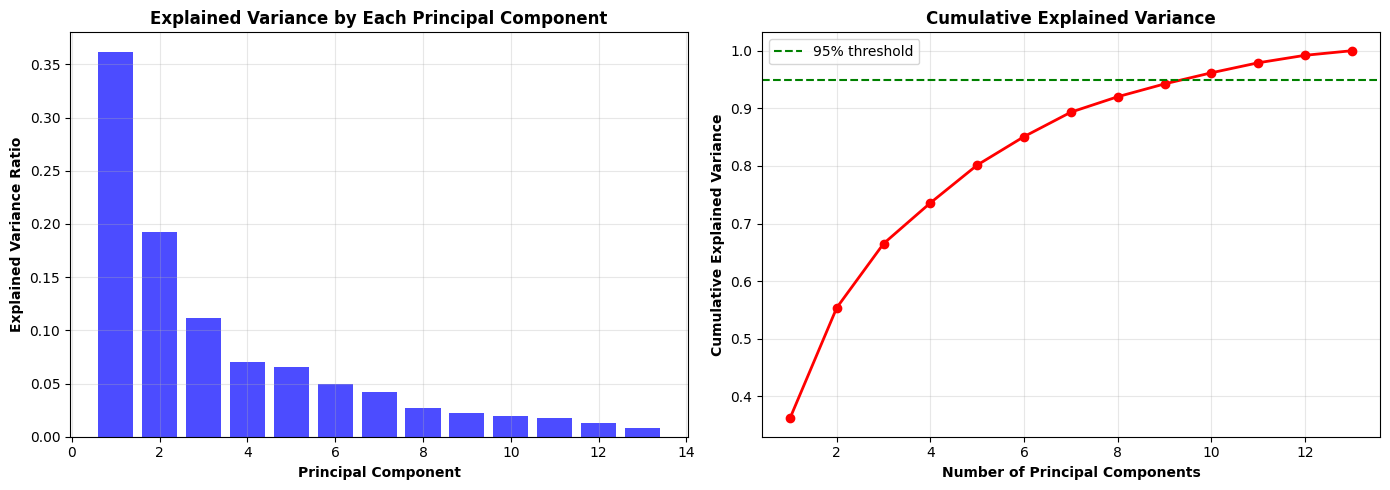

In [30]:
# Plot explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Individual explained variance
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
ax1.set_xlabel('Principal Component', fontweight='bold')
ax1.set_ylabel('Explained Variance Ratio', fontweight='bold')
ax1.set_title('Explained Variance by Each Principal Component', fontweight='bold')
ax1.grid(True, alpha=0.3)

# Cumulative explained variance
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linewidth=2, color='red')
ax2.axhline(y=0.95, color='green', linestyle='--', label='95% threshold')
ax2.set_xlabel('Number of Principal Components', fontweight='bold')
ax2.set_ylabel('Cumulative Explained Variance', fontweight='bold')
ax2.set_title('Cumulative Explained Variance', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### PCA with 2 Components - 2D Visualization

In [31]:
# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Create DataFrame for visualization
df_pca_2d = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['target'] = y
df_pca_2d['class'] = df_pca_2d['target'].map({0: 'Class 0', 1: 'Class 1', 2: 'Class 2'})

print(f"Explained variance with 2 components: {pca_2d.explained_variance_ratio_.sum():.4f}")
print(f"PC1 explains: {pca_2d.explained_variance_ratio_[0]:.4f}")
print(f"PC2 explains: {pca_2d.explained_variance_ratio_[1]:.4f}")

Explained variance with 2 components: 0.5541
PC1 explains: 0.3620
PC2 explains: 0.1921


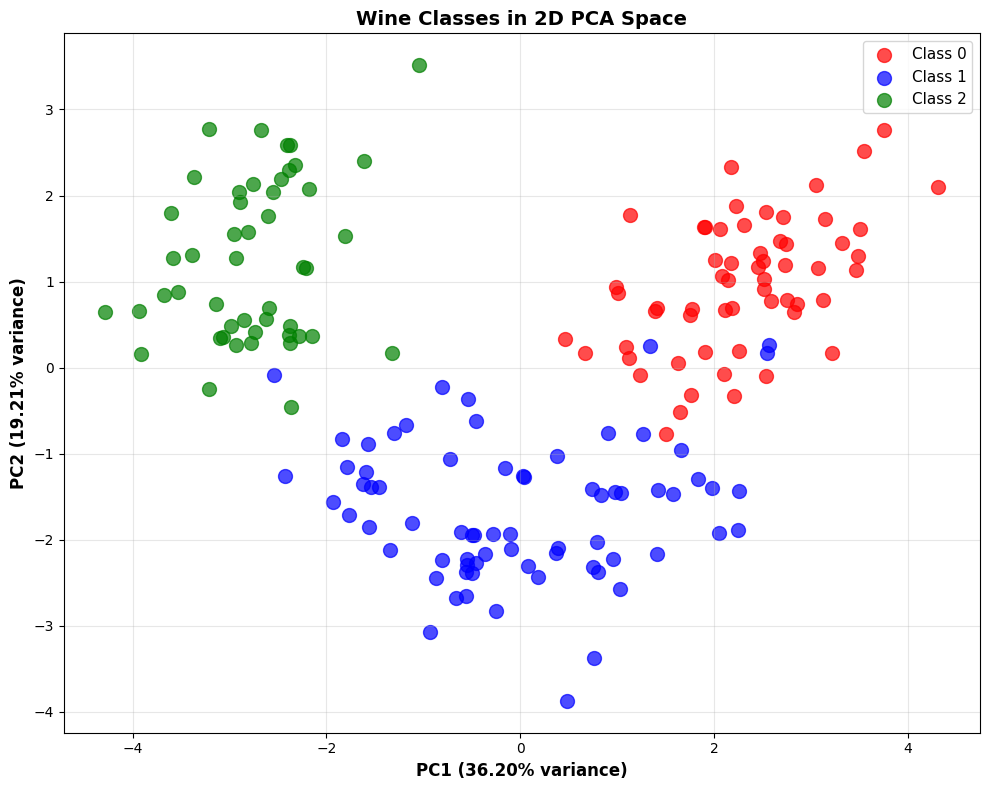

2D PCA visualization created successfully!


In [32]:
# Plot 2D PCA
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']

for class_label in np.unique(y):
    class_mask = df_pca_2d['target'] == class_label
    plt.scatter(df_pca_2d[class_mask]['PC1'], df_pca_2d[class_mask]['PC2'],
               label=f'Class {class_label}', alpha=0.7, s=100, color=colors[class_label])

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)', fontweight='bold', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)', fontweight='bold', fontsize=12)
plt.title('Wine Classes in 2D PCA Space', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("2D PCA visualization created successfully!")

### PCA with 3 Components - 3D Visualization

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"Explained variance with 3 components: {pca_3d.explained_variance_ratio_.sum():.4f}")
print(f"PC1 explains: {pca_3d.explained_variance_ratio_[0]:.4f}")
print(f"PC2 explains: {pca_3d.explained_variance_ratio_[1]:.4f}")
print(f"PC3 explains: {pca_3d.explained_variance_ratio_[2]:.4f}")

Explained variance with 3 components: 0.6653
PC1 explains: 0.3620
PC2 explains: 0.1921
PC3 explains: 0.1112


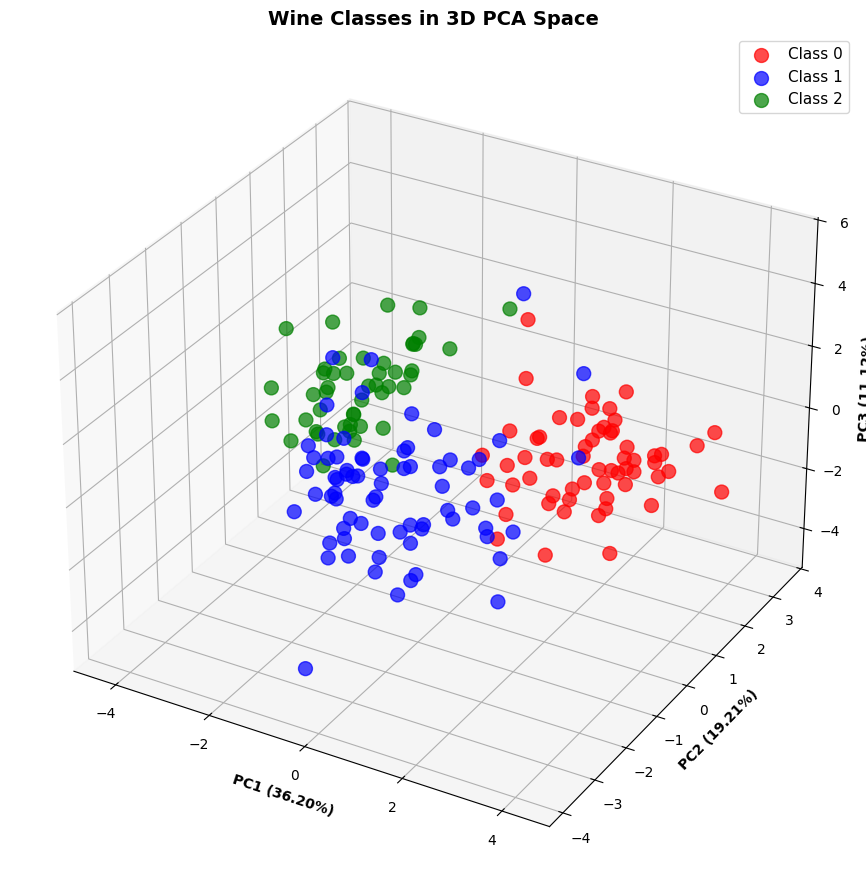

3D PCA visualization created successfully!


In [34]:
# Plot 3D PCA
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'blue', 'green']

for class_label in np.unique(y):
    class_mask = y == class_label
    ax.scatter(X_pca_3d[class_mask, 0], X_pca_3d[class_mask, 1], X_pca_3d[class_mask, 2],
              label=f'Class {class_label}', alpha=0.7, s=100, color=colors[class_label])

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})', fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})', fontweight='bold')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})', fontweight='bold')
ax.set_title('Wine Classes in 3D PCA Space', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

print("3D PCA visualization created successfully!")

### Principal Components (Loadings)

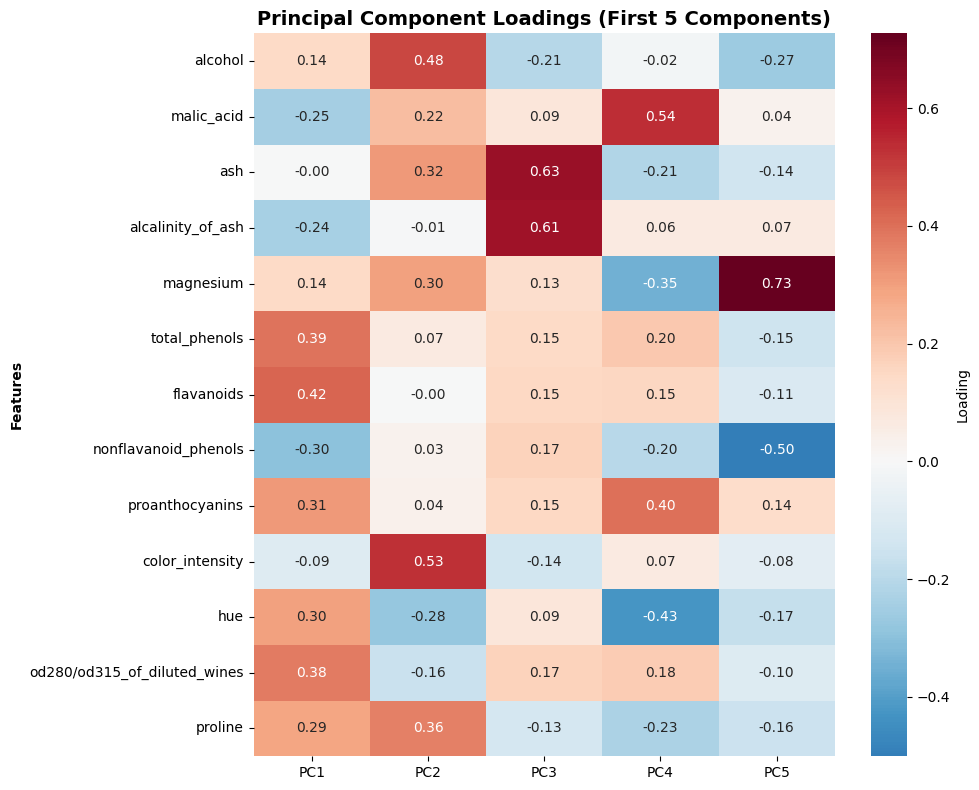

Principal Component Loadings:
                                   PC1       PC2       PC3       PC4       PC5
alcohol                       0.144329  0.483652 -0.207383 -0.017856 -0.265664
malic_acid                   -0.245188  0.224931  0.089013  0.536890  0.035214
ash                          -0.002051  0.316069  0.626224 -0.214176 -0.143025
alcalinity_of_ash            -0.239320 -0.010591  0.612080  0.060859  0.066103
magnesium                     0.141992  0.299634  0.130757 -0.351797  0.727049
total_phenols                 0.394661  0.065040  0.146179  0.198068 -0.149318
flavanoids                    0.422934 -0.003360  0.150682  0.152295 -0.109026
nonflavanoid_phenols         -0.298533  0.028779  0.170368 -0.203301 -0.500703
proanthocyanins               0.313429  0.039302  0.149454  0.399057  0.136860
color_intensity              -0.088617  0.529996 -0.137306  0.065926 -0.076437
hue                           0.296715 -0.279235  0.085222 -0.427771 -0.173615
od280/od315_of_diluted

In [35]:
# Create heatmap of principal components (loadings)
loadings = pca_full.components_[:5, :].T
loading_matrix = pd.DataFrame(
    pca_full.components_[:5, :].T,
    columns=[f'PC{i+1}' for i in range(5)],
    index=wine.feature_names
)

plt.figure(figsize=(10, 8))
sns.heatmap(loading_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            cbar_kws={'label': 'Loading'})
plt.title('Principal Component Loadings (First 5 Components)', fontsize=14, fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.tight_layout()
plt.show()

print("Principal Component Loadings:")
print(loading_matrix)

## Summary

**Key Findings:**
- The Wine dataset was successfully loaded and analyzed
- Basic statistics revealed the distribution and range of wine features
- Boxplots showed class-specific feature distributions
- Scatterplots demonstrated feature relationships and class separability
- Covariance matrix revealed feature correlations
- Features were standardized for equal contribution to PCA
- PCA successfully reduced dimensionality while preserving variance
- The first 2 principal components capture significant variance and show good class separation
- 3 components explain approximately 73% of total variance
- Principal components loadings indicate which original features contribute most to each PC